In [153]:
import numpy as np
import skimage as sk
import skimage.io as skio
import time

from scipy.signal import convolve2d
from cv2 import getGaussianKernel

In [144]:
im = skio.imread('./cameraman.png')
im = im[:,:,0]

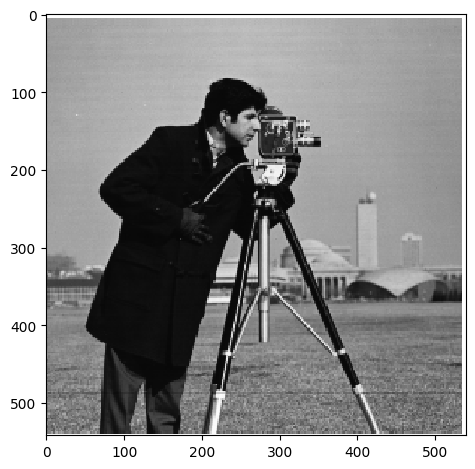

In [145]:
skio.imshow(im)

In [283]:
# Part 1

# 1.1
Dx = np.array([[1,-1]])
Dy = np.array([[1],
      [-1]])

derivative_x = convolve2d(im, Dx)
derivative_y = convolve2d(im, Dy)

# trimming excess
derivative_x = derivative_x[:,:-1]
derivative_y = derivative_y[:-1,:]

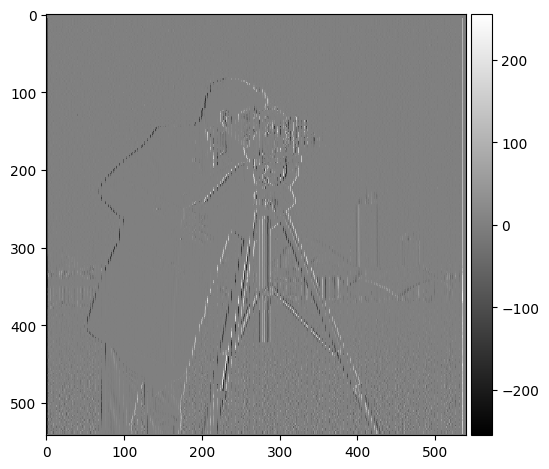

In [284]:
skio.imshow(derivative_x, cmap = 'gray')

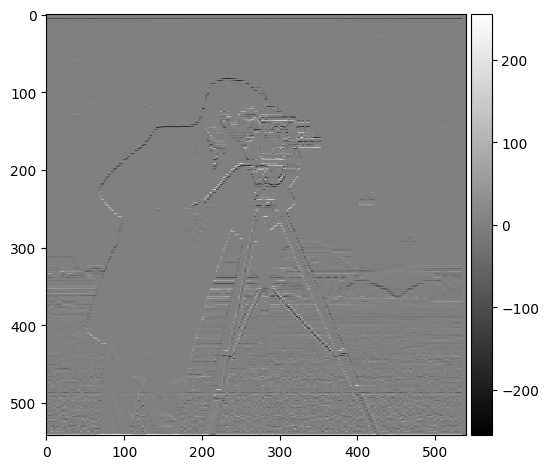

In [285]:
skio.imshow(derivative_y, cmap = 'gray')

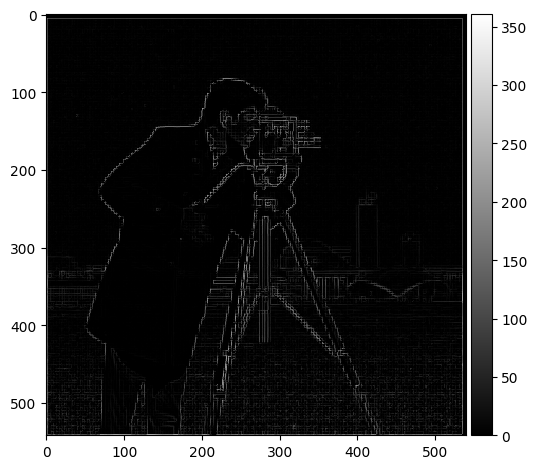

In [287]:
gradient_magnitude = np.sqrt(derivative_x**2 + derivative_y**2)
skio.imshow(gradient_magnitude, cmap = 'gray')

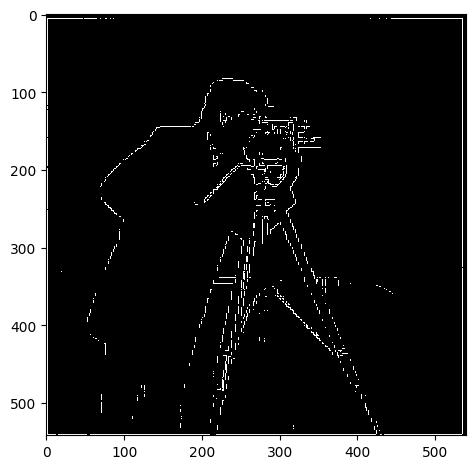

In [288]:
binarized_gradient = gradient_magnitude > 90
skio.imshow(binarized_gradient)

In [239]:
# 1.2
G_1D = getGaussianKernel(5, 2)
G = G_1D*np.transpose(G_1D)

In [276]:
gaussian_im = convolve2d(im, G)
gaussian_d_x = convolve2d(gaussian_im, Dx)
gaussian_d_y = convolve2d(gaussian_im, Dy)

# trimming excess
gaussian_d_x = gaussian_d_x[:,:-1]
gaussian_d_y = gaussian_d_y[:-1,:]

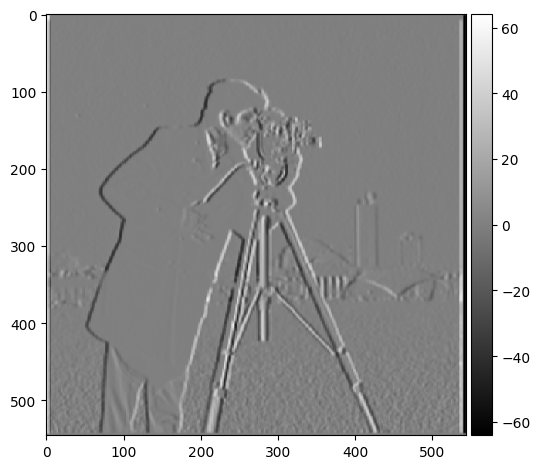

In [289]:
skio.imshow(gaussian_d_x, cmap = 'gray')

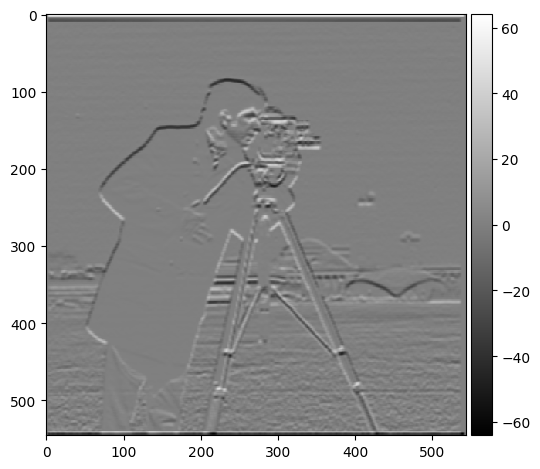

In [290]:
skio.imshow(gaussian_d_y, cmap = 'gray')

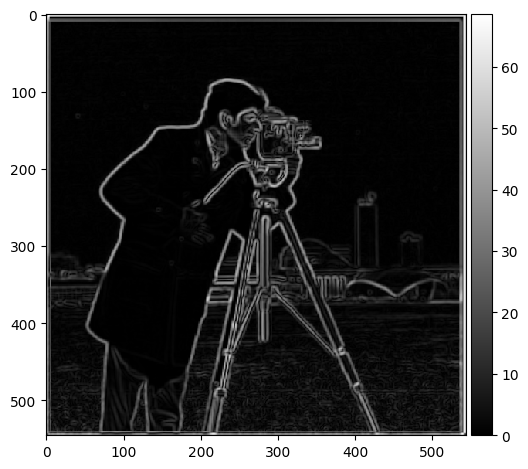

In [291]:
gaussian_gradient_magnitude = np.sqrt(gaussian_d_x**2 + gaussian_d_y**2)
skio.imshow(gaussian_gradient_magnitude, cmap = 'gray')

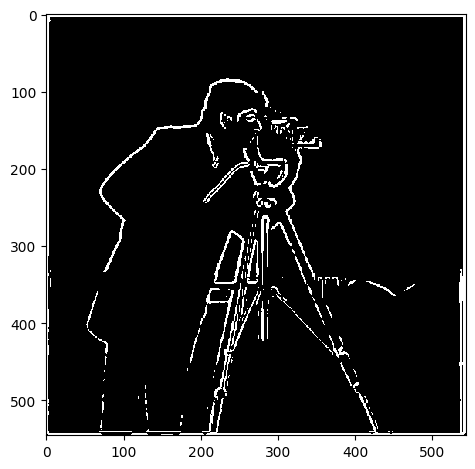

In [292]:
gaussian_binarized_gradient = gaussian_gradient_magnitude > 26
skio.imshow(gaussian_binarized_gradient)

We could see that the edge is a lot smoother in the gradient image. As a result, the edge image performs better (less gap in betwee) with curated threshold.

In [293]:
DoGx_Operator = convolve2d(Dx, G)
DoGy_Operator = convolve2d(Dy, G)
DoGx = convolve2d(im, DoGx_Operator)
DoGy = convolve2d(im, DoGy_Operator)

# trimming excess
DoGx = DoGx[:,:-1]
DoGy = DoGy[:-1,:]

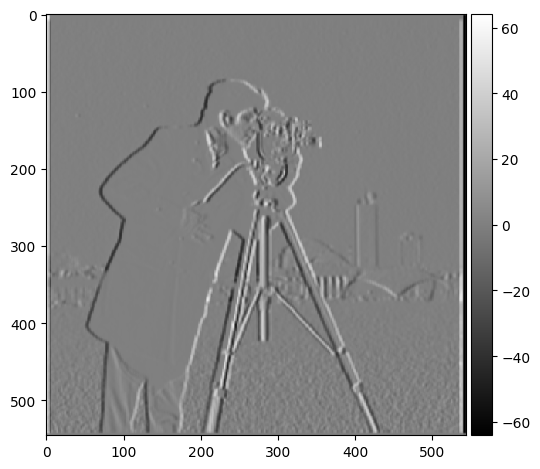

In [294]:
skio.imshow(DoGx, cmap = 'gray')

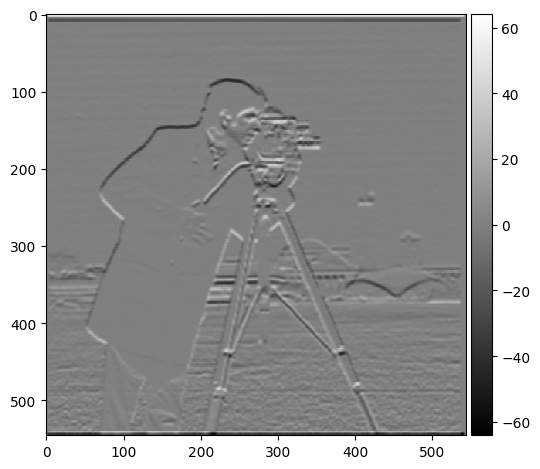

In [303]:
skio.imshow(DoGy, cmap = 'gray')

/Users/yilinni/anaconda3/envs/COMPSCI280/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


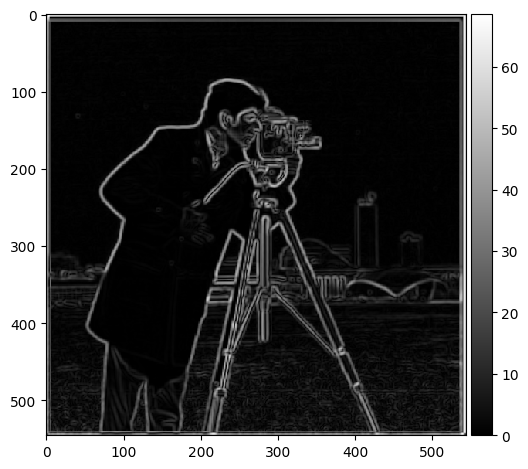

In [304]:
gradient_magnitude_g = np.sqrt(DoGx**2 + DoGy**2)
skio.imshow(gradient_magnitude_g, cmap = 'gray')

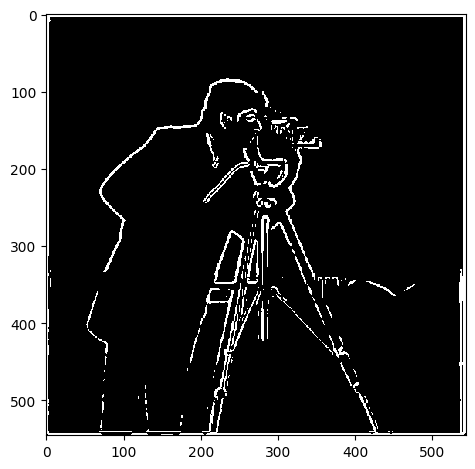

In [307]:
gradient_magnitude_g_binarized = gradient_magnitude_g > 26
skio.imshow(gradient_magnitude_g_binarized)

Those two edge images while having different order of processing, are identical.